# <div style="text-align:center">Jensen-Shannon practice</div>


    
### 1. import libs
### 2. import data set
### 3. show some information about dataset
### 4. Define Jensen-Shannon function


In [23]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import scipy as sp
sns.set()

In [3]:
#import data
dataset = pd.read_csv('titanic.csv')
dataset.fillna(method='bfill', inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [6]:
# show data
dataset.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.870561,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.597668,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
def jsd(p,q, base = np.e):
    p, q = np.asarray(p) , np.asarray(q)
    p, q = p / p.sum() , q / q.sum()
    m = 1.0 / 2*(p + q)
    return sp.stats.entropy(p, m, base=base) / 2.0 + sp.stats.entropy(q, m, base=base) / 2.0

In [9]:
men = dataset[dataset['Sex'] =='male']
women = dataset[dataset['Sex'] =='female']


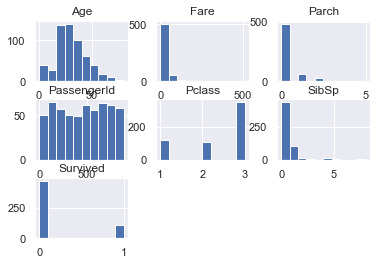

In [16]:
men.hist()
men = men['Survived']

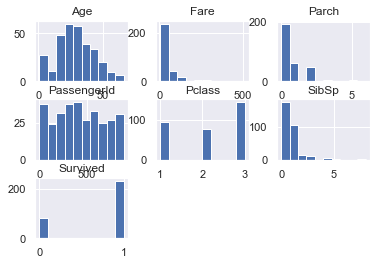

In [21]:
women.hist()
women = women['Survived']


    i: 1
    

    c: [468   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 109]
    c2:[ 81   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 233] 
    
0.16298604064066557

    i: 11
    

    c: [468   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 

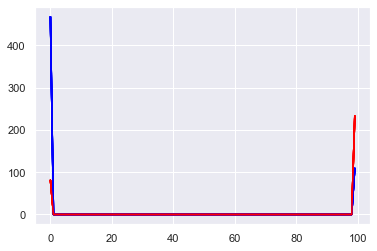

In [28]:
for i in range(1,100,10):
    print("""
    i: {}
    """.format(i))
    c, d = np.histogram(men, bins=100)
    c2, d2 = np.histogram(women, bins=100)
    print("""
    c: {}
    c2:{} 
    """.format(c ,c2))
    
    print(jsd(c2,c))
    plt.plot(c, c='blue')
    plt.plot(c2, c='red')
    

In [ ]:
# resources and furthur reading:
# https://hub.docker.com/_/redis
# https://www.ionos.com/community/hosting/redis/using-redis-in-docker-containers/
# https://markheath.net/post/exploring-redis-with-docker
# https://realpython.com/python-redis/